[nltk_data] Downloading package punkt to
[nltk_data]     d:\Users\mihac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(339, 8)
   index                                    Changed_article  \
0      0  A Hybrid For-Profit and Nonprofit Impact Ventu...   
1      0  The FDA's review process for COVID-19 tests ha...   
2      0  Tesla will temporarily shut down its car manuf...   
3      0  USA TODAY\n\nAs the novel coronavirus spreads ...   
4      0  The FDA has given emergency authorization for ...   

                                        Changed_json  \
0  {\n    "Antioxidant capacity": "* Antioxidant ...   
1  {\n    "Emergency Use Authorization": "* The F...   
2  {\n    "Business Operations": "Tesla will temp...   
3  {\n    "Number of confirmed coronavirus cases"...   
4  {\n    "Self-swabbing": "* The FDA has given e...   

                                    Original_article  \
0  Article courtesy of Kenneth Kwok Co-President ...   
1  The FDA has quickly given the OK to the second...   
2  Tesla will temporarily shut down its car manuf...   
3  USA TODAY\n\nAs the novel coronavirus spreads ..

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

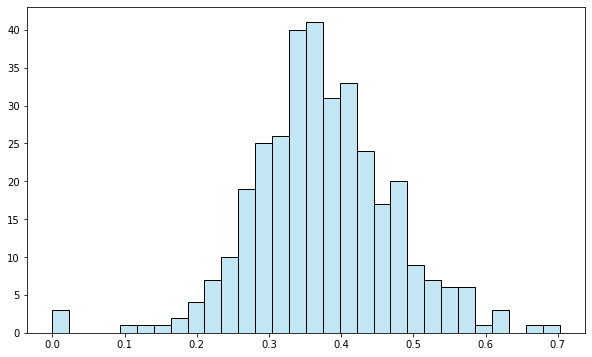

In [3]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity


# Download NLTK's Punkt tokenizer models (run once)
nltk.download('punkt')

import os

# Example: Loading articles from a CSV file
# The CSV should have a column named 'article_content' containing the articles
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
directory = os.path.join(parent_directory,"vaccination_synthetic_articles_combined.csv" )


df = pd.read_csv(directory)

# Display the first few rows to verify
print(df.shape)
print(df.head())
 # Initialize the SBERT model
model = SentenceTransformer('all-mpnet-base-v2')  # You can choose other models if desired
def split_into_sentences(article_text):
    """
    Splits the article into individual sentences.

    Parameters:
    - article_text (str): The text of the article.

    Returns:
    - List[str]: A list of sentences.
    """
    sentences = sent_tokenize(article_text)
    return sentences

def get_sentence_embeddings(sentences, model):
    """
    Generates embeddings for each sentence using SBERT.

    Parameters:
    - sentences (List[str]): List of sentences.
    - model (SentenceTransformer): Pre-loaded SBERT model.

    Returns:
    - np.ndarray: Array of sentence embeddings.
    """
    embeddings = model.encode(sentences)
    return embeddings

def compute_coherence_score(embeddings):
    """
    Computes the coherence score of an article based on the cosine similarity 
    between consecutive sentence embeddings.

    Parameters:
    - embeddings (np.ndarray): Array of sentence embeddings.

    Returns:
    - float: The coherence score (average cosine similarity).
    """
    if len(embeddings) < 2:
        # Not enough sentences to compute coherence
        return 0.0

    # Initialize total similarity
    total_similarity = 0.0
    num_pairs = len(embeddings) - 1

    # Iterate over consecutive sentence pairs
    for i in range(num_pairs):
        # Reshape embeddings for cosine_similarity
        emb1 = embeddings[i].reshape(1, -1)
        emb2 = embeddings[i + 1].reshape(1, -1)
        similarity = cosine_similarity(emb1, emb2)[0][0]
        total_similarity += similarity

    # Calculate average similarity
    coherence_score = total_similarity / num_pairs
    return coherence_score

def compute_article_coherence1(df, article_column='article_content'):
    """
    Computes the contextual coherence score for each article in the DataFrame.

    Parameters:
    - df (pd.DataFrame): DataFrame containing articles.
    - article_column (str): The column name that contains the article text.

    Returns:
    - pd.DataFrame: Original DataFrame with an additional 'coherence_score' column.
    """
    # Initialize a list to store coherence scores
    coherence_scores = []

    # Iterate over each article
    for index, row in df.iterrows():
        article_text = row[article_column]

        # Handle missing or NaN articles
        if pd.isna(article_text):
            coherence_scores.append(0.0)
            continue

        # Split the article into sentences
        sentences = split_into_sentences(article_text)

        # Generate embeddings for the sentences
        embeddings = get_sentence_embeddings(sentences, model)

        # Compute the coherence score
        score = compute_coherence_score(embeddings)

        # Append the score to the list
        coherence_scores.append(score)

        # Optional: Print progress every 100 articles
        if (index + 1) % 100 == 0:
            print(f'Processed {index + 1} articles.')

    # Add the coherence scores to the DataFrame
    df['coherence_score'] = coherence_scores

    return df

















#____________________________________________________________________________________________
# Program another embedding.


 # Initialize the SBERT model
model = SentenceTransformer('all-mpnet-base-v2')  # You can choose other models if desired
def split_into_sentences(article_text):
    """
    Splits the article into individual sentences.

    Parameters:
    - article_text (str): The text of the article.

    Returns:
    - List[str]: A list of sentences.
    """
    sentences = sent_tokenize(article_text)
    return sentences

def get_sentence_embeddings(sentences, model):
    """
    Generates embeddings for each sentence using SBERT.

    Parameters:
    - sentences (List[str]): List of sentences.
    - model (SentenceTransformer): Pre-loaded SBERT model.

    Returns:
    - np.ndarray: Array of sentence embeddings.
    """
    embeddings = model.encode(sentences)
    return embeddings

def compute_coherence_score(embeddings):
    """
    Computes the coherence score of an article based on the cosine similarity 
    between consecutive sentence embeddings.

    Parameters:
    - embeddings (np.ndarray): Array of sentence embeddings.

    Returns:
    - float: The coherence score (average cosine similarity).
    """
    if len(embeddings) < 2:
        # Not enough sentences to compute coherence
        return 0.0

    # Initialize total similarity
    total_similarity = 0.0
    num_pairs = len(embeddings) - 1

    # Iterate over consecutive sentence pairs
    for i in range(num_pairs):
        # Reshape embeddings for cosine_similarity
        emb1 = embeddings[i].reshape(1, -1)
        emb2 = embeddings[i + 1].reshape(1, -1)
        similarity = cosine_similarity(emb1, emb2)[0][0]
        total_similarity += similarity

    # Calculate average similarity
    coherence_score = total_similarity / num_pairs
    return coherence_score

def compute_article_coherence2(df, article_column='article_content'):
    """
    Computes the contextual coherence score for each article in the DataFrame.

    Parameters:
    - df (pd.DataFrame): DataFrame containing articles.
    - article_column (str): The column name that contains the article text.

    Returns:
    - pd.DataFrame: Original DataFrame with an additional 'coherence_score' column.
    """
    # Initialize a list to store coherence scores
    coherence_scores = []

    # Iterate over each article
    for index, row in df.iterrows():
        article_text = row[article_column]

        # Handle missing or NaN articles
        if pd.isna(article_text):
            coherence_scores.append(0.0)
            continue

        # Split the article into sentences
        sentences = split_into_sentences(article_text)

        # Generate embeddings for the sentences
        embeddings = get_sentence_embeddings(sentences, model)

        # Compute the coherence score
        score = compute_coherence_score(embeddings)

        # Append the score to the list
        coherence_scores.append(score)

        # Optional: Print progress every 100 articles
        if (index + 1) % 100 == 0:
            print(f'Processed {index + 1} articles.')

    # Add the coherence scores to the DataFrame
    df['coherence_score'] = coherence_scores

    return df















(339,)
(339,)
[0.43091349 0.43037173 0.28799779 0.44741561 0.39489463 0.40949298
 0.39802495 0.32414499 0.33524656 0.43115732 0.42793763 0.54590268
 0.339182   0.28129175 0.3600493  0.41287923 0.31977857 0.25296576
 0.47976005 0.34799898 0.35665092 0.56275091 0.4137762  0.42187944
 0.46502082 0.61924446 0.46771469 0.46858245 0.33868548 0.55906969
 0.40272285 0.40621272 0.36730923 0.54838888 0.40668107 0.40603022
 0.39007948 0.51530334 0.58033268 0.53425384 0.34063712 0.27950447
 0.45514583 0.49028755 0.30399976 0.58275966 0.34079666 0.
 0.35312073 0.19591554 0.38715901 0.6194094  0.34708465 0.29548658
 0.32798282 0.33946782 0.38922328 0.36221983 0.47145828 0.26351449
 0.37869434 0.52552231 0.36707301 0.18380898 0.39542856 0.33867821
 0.38451841 0.36450423 0.51383339 0.2464523  0.26217032 0.36464378
 0.36086557 0.39653488 0.44350213 0.         0.2646449  0.29468473
 0.32694811 0.35077557 0.29116236 0.47037886 0.36950622 0.42418362
 0.33246817 0.28821532 0.47371709 0.49204974 0.42425267 

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

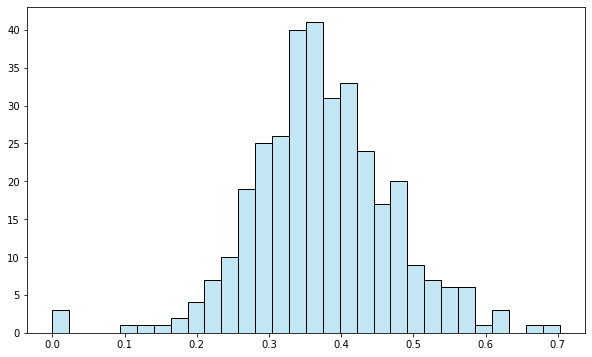

In [8]:
#_____________________________________________________________________________________________________________________________-
# Compute coherence scores

df_original = compute_article_coherence1(df, article_column='Original_article')
df_fake_articles = compute_article_coherence2(df, article_column='Changed_article')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert the 'coherence_score' columns to a 1D numpy array to avoid multi-dimensional indexing issues
coherence_scores_original = np.array(df_original['coherence_score'])
coherence_scores_fake = np.array(df_fake_articles['coherence_score'])

# Check if the arrays are valid one-dimensional
print(coherence_scores_original.shape)  # Should output (n,) where n is the number of rows
print(coherence_scores_fake.shape)  # Should output (n,)

# Now proceed with plotting
plt.figure(figsize=(10, 6))

# First dataset (original data)
coherence_scores_original = np.array(coherence_scores_original)
print(coherence_scores_original)
sns.histplot(coherence_scores_original, bins=30, kde=True, color='skyblue', label='Original Data')

# Second dataset (fake articles)
coherence_scores_fake = np.array(coherence_scores_fake)
sns.histplot(coherence_scores_fake, bins=30, kde=True, color='orange', label='Fake Articles')

# Adding titles and labels
plt.title('Distribution of Article Coherence Scores')
plt.xlabel('Coherence Score')
plt.ylabel('Number of Articles')

# Adding a legend to differentiate between datasets
plt.legend()

# Show plot
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure both original and changed datasets have the same length
if len(df_original) != len(df_fake_articles):
    raise ValueError("Original and fake article datasets must have the same length for comparison.")

# Subtract coherence scores of original and changed articles
coherence_difference = df_original['coherence_score'] - df_fake_articles['coherence_score']

# Convert the differences to a numpy array (optional, depending on your preference)
coherence_difference = np.array(coherence_difference)

# Plotting the histogram of differences
plt.figure(figsize=(20, 12))

# Plot the difference in coherence scores
sns.histplot(coherence_difference, bins=50, kde=True, color='purple', label='Difference (Original - Changed)')

# Adding titles and labels
plt.title('Distribution of Differences in Article Coherence Scores (Original - Changed)')
plt.xlabel('Difference in Coherence Score')
plt.ylabel('Number of Articles')

# Adding a legend
plt.legend()

# Show plot
plt.show()